In [1]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot

In [2]:
from statiskit import (linalg,
                       core,
                       pgm)

In [3]:
import math
import os

In [4]:
if not 'K' in os.environ:
    os.environ['K'] = str(20)
K = int(os.environ.get('K'))
os.environ['WALK'] = 'chordal'
sampling = !jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.ipynb
del os.environ['WALK']
graph = pgm.read_gml('graph.gml')
data = core.read_csv('data.csv')

In [5]:
import time
try:
    prev = time.time()
    mle = pgm.graphical_gaussian_estimation(algo='DG',
                                            data=data,
                                            graph=graph.directed_graph)
except:
    curr = time.time()
    T = curr - prev
    logL = float("nan")
else:
    curr = time.time()
    T = curr - prev
    logL = mle.estimated.loglikelihood(data)

In [6]:
Ts = []
logLs = []
ALGO = ['CG', 'NR', 'GA', 'sGA']
for algo in ALGO:
    try:
        prev = time.time()
        alge = pgm.graphical_gaussian_estimation(algo=algo,
                                                 data=data,
                                                 graph=graph)
    except:
        curr = time.time()
        Ts.append(T / (curr - prev))
        logLs.append(float("nan"))
    else:
        curr = time.time()
        Ts.append(T / (curr - prev))
        _logL = alge.estimated.loglikelihood(data)
        if math.isnan(logL) or math.isinf(logL):
            if math.isnan(_logL) or math.isinf(_logL):
                logLs.append(float("nan"))
            else:
                logLs.append(float("inf"))            
        else:
            if math.isnan(_logL) or math.isinf(_logL):
                logLs.append(0)
            else:
                logLs.append(alge.estimated.loglikelihood(data) / logL)

<IPython.core.display.Javascript object>


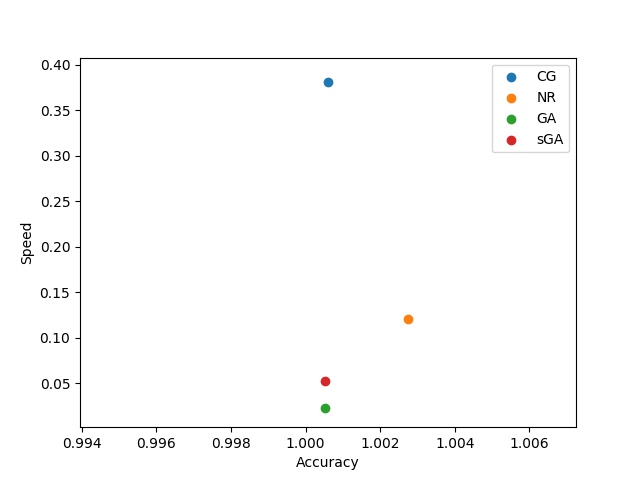

In [7]:
fig = pyplot.figure()
axes = fig.add_subplot(1, 1, 1)
for algo, quantities in zip(ALGO, zip(logLs, Ts)):
    axes.scatter(*quantities, label=algo)
axes.set_xlabel("Accuracy")
axes.set_ylabel("Speed")
axes.legend()

In [8]:
import hashlib
from datetime import datetime
identifier = hashlib.md5(str(datetime.today())).hexdigest()
if not os.path.exists('algorithms.csv'):
    with open('algorithms.csv', 'w') as filehandler:
        filehandler.write('identifier,dimension,algorithm,speed,accuracy\n')
with open('algorithms.csv', 'a') as filehandler:
    for algo, T, logL in zip(ALGO, Ts, logLs):
        filehandler.write(','.join([identifier, str(K), str(algo), str(T), str(logL)]) + '\n')

In [9]:
os.remove('graph.gml')
os.remove('data.csv')